# HW2_Q2

detection in ring data with perceptron: in this problem is the non-linear nature of the data.  Our data is two-class and loop-shaped, which means we cannot separate them with a straight line which is the basis of perceptron decision-making.  As a linear classifier, perceptrons do not have the ability to separate non-linear data.
therefore perceptron does not converge for these data. also perceptron activation function is sigmoid that makes the model uncapable of modeling more complexities.

As a result, the perceptron is not suitable for circular data classification and due to its linear nature, it cannot create the desired decision boundary.  To solve this problem, more complex machine learning algorithms should be used that are capable of modeling non-linear functions.

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# data generation

In [67]:
def generate_circular_data(radius, width, num_points):

    X = np.random.uniform(low=-1, high=1, size=(num_points, 2))
    y = np.zeros(num_points)

    for i in range(num_points):
        distance = np.sqrt(X[i, 0]**2 + X[i, 1]**2)
        if radius - width/2 <= distance <= radius + width/2:
            y[i] = 1

    return X, y

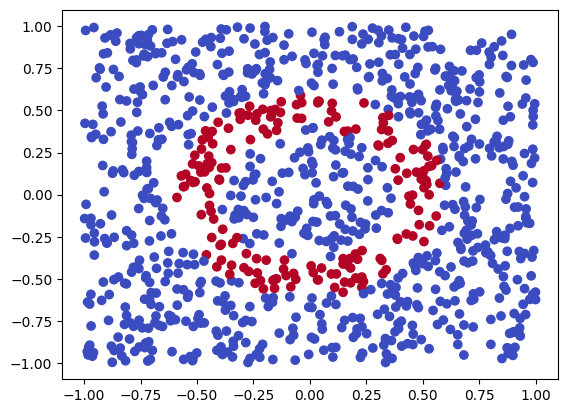

In [68]:
X, y = generate_circular_data(0.5, 0.2, 1000)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

# perceptron

In [69]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        # Initialize weights and bias randomly
        self.weights = np.random.rand(X.shape[1])
        self.bias = np.random.rand()

        for _ in range(self.epochs):
            for i in range(len(X)):
                # Calculate the linear combination of inputs and weights
                z = np.dot(X[i], self.weights) + self.bias

                # Apply the activation function (sigmoid)
                y_pred = self.sigmoid(z)

                # Calculate the error
                error = y[i] - y_pred

                # Update weights and bias using gradient descent
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return np.round(y_pred)  # Round the predicted values to 0 or 1

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

creat & train and evaluate

In [70]:
perceptron = Perceptron()

perceptron.fit(X, y)

y_pred = perceptron.predict(X)

accuracy = np.mean(y_pred == y)
print("Accuracy:", accuracy)

Accuracy: 0.827


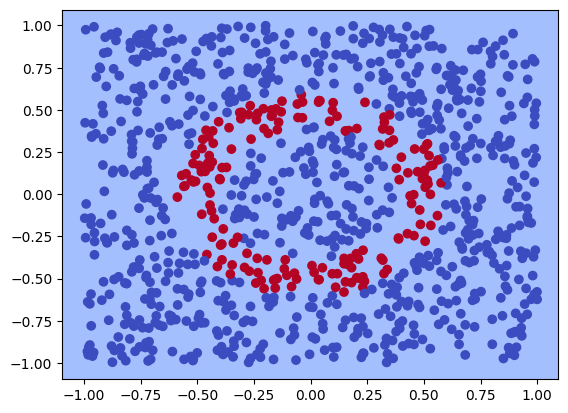

In [71]:
def plot_decision_boundary(X, y, perceptron):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.show()


plot_decision_boundary(X, y, perceptron)

considering the fact that this data is non-linear and Perceptrons are linear classifiers, it's obvious the classification is not so effective or accurate. SVM for ecample would be a better classifier.